In [1]:
import tensorflow as tf 
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np 

In [2]:
tf.config.experimental.list_physical_devices()

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]

In [3]:
(xtrain, ytrain), (xtest, ytest) = tf.keras.datasets.cifar10.load_data()
xtrain.shape

(50000, 32, 32, 3)

In [8]:
def plot_image(index):
    plt.figure(figsize=(1,1))
    plt.imshow(xtrain[index])

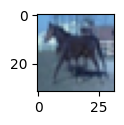

In [12]:
plot_image(499)

In [13]:
xtrain[0]

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

In [15]:
xtrain_scaled = xtrain/255
xtest_scaled = xtest/255
xtrain_scaled[0]

array([[[0.23137255, 0.24313725, 0.24705882],
        [0.16862745, 0.18039216, 0.17647059],
        [0.19607843, 0.18823529, 0.16862745],
        ...,
        [0.61960784, 0.51764706, 0.42352941],
        [0.59607843, 0.49019608, 0.4       ],
        [0.58039216, 0.48627451, 0.40392157]],

       [[0.0627451 , 0.07843137, 0.07843137],
        [0.        , 0.        , 0.        ],
        [0.07058824, 0.03137255, 0.        ],
        ...,
        [0.48235294, 0.34509804, 0.21568627],
        [0.46666667, 0.3254902 , 0.19607843],
        [0.47843137, 0.34117647, 0.22352941]],

       [[0.09803922, 0.09411765, 0.08235294],
        [0.0627451 , 0.02745098, 0.        ],
        [0.19215686, 0.10588235, 0.03137255],
        ...,
        [0.4627451 , 0.32941176, 0.19607843],
        [0.47058824, 0.32941176, 0.19607843],
        [0.42745098, 0.28627451, 0.16470588]],

       ...,

       [[0.81568627, 0.66666667, 0.37647059],
        [0.78823529, 0.6       , 0.13333333],
        [0.77647059, 0

In [20]:
ytrain_categorical = keras.utils.to_categorical(ytrain, num_classes=10)
ytest_categorical = keras.utils.to_categorical(ytest, num_classes=10)
ytrain_categorical[9]

array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0.])

In [21]:
32*32*3

3072

In [23]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(32,32,3)),
    keras.layers.Dense(3000, activation='relu'),
    keras.layers.Dense(1000,activation='relu'),
    keras.layers.Dense(10,activation='sigmoid')
])

model.compile(
    optimizer='SGD',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

model.fit(xtrain_scaled, ytrain_categorical, epochs=50)

Epoch 1/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 99s 58ms/step - accuracy: 0.3065 - loss: 1.9314
Epoch 2/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 93s 59ms/step - accuracy: 0.4215 - loss: 1.6424
Epoch 3/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 94s 60ms/step - accuracy: 0.4565 - loss: 1.5498
Epoch 4/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 92s 59ms/step - accuracy: 0.4783 - loss: 1.4822
Epoch 5/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 91s 58ms/step - accuracy: 0.4940 - loss: 1.4300
Epoch 6/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 90s 58ms/step - accuracy: 0.5104 - loss: 1.3900
Epoch 7/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 84s 54ms/step - accuracy: 0.5260 - loss: 1.3539
Epoch 8/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 85s 54ms/step - accuracy: 0.5402 - loss: 1.3141
Epoch 9/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 85s 55ms/step - accuracy: 0.5496 - loss: 1.2812
Epoch 10/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 87s 56ms/step - accuracy: 0.5622 - loss: 1.2487
Epoch 11/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 85s 54ms/step - accuracy: 0.5715 - loss: 1.2202
Epoch 12

In [27]:
model.evaluate(xtest_scaled, ytest_categorical)

313/313 ━━━━━━━━━━━━━━━━━━━━ 6s 19ms/step - accuracy: 0.5714 - loss: 1.5394


[1.5431054830551147, 0.5669999718666077]

In [30]:
pred = model.predict(xtest_scaled)

313/313 ━━━━━━━━━━━━━━━━━━━━ 6s 19ms/step


In [34]:
ypred = [np.argmax(i) for i in pred]

In [35]:
ypred[:10]

[np.int64(3),
 np.int64(8),
 np.int64(8),
 np.int64(0),
 np.int64(4),
 np.int64(6),
 np.int64(1),
 np.int64(6),
 np.int64(3),
 np.int64(1)]

In [36]:
ytest[:10]

array([[3],
       [8],
       [8],
       [0],
       [6],
       [6],
       [1],
       [6],
       [3],
       [1]], dtype=uint8)

In [53]:
model.save(filepath='C:/Users/EDWIN/OneDrive/Desktop/DL/pics.keras')

In [56]:
model2 = tf.keras.models.load_model(
    'C:/Users/EDWIN/OneDrive/Desktop/DL/pics.keras',
    custom_objects=None, compile=True)

In [57]:
model2.predict(xtest_scaled)

313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step


array([[3.0414960e-01, 6.1833179e-01, 6.4049304e-01, ..., 7.0050481e-04,
        8.6348706e-01, 1.1979763e-01],
       [6.7223370e-01, 9.8963487e-01, 1.2870817e-01, ..., 6.8864298e-01,
        9.9995625e-01, 9.9402446e-01],
       [9.7964329e-01, 9.8114640e-01, 1.2109685e-01, ..., 9.8994005e-01,
        9.9855268e-01, 8.6140817e-01],
       ...,
       [1.4524542e-01, 1.9175529e-03, 9.9174738e-01, ..., 9.1611177e-01,
        8.3333939e-01, 3.4873903e-01],
       [5.1672232e-01, 2.8218037e-02, 9.7938436e-01, ..., 9.4389242e-01,
        4.5532979e-02, 1.2676044e-01],
       [2.6237723e-01, 3.6879133e-02, 7.1957892e-01, ..., 9.9887949e-01,
        1.3463335e-01, 2.5303110e-01]], dtype=float32)